# Python for data analytics – Project assessment

In [ ]:
# imports
import pandas as pd

## Task 1 - Load your data

### Assignment Spec
> You should take your data from three files:
>  * data/afl/stats.csv
>  * data/afl/players.csv
>  * data/afl/games.csv
>
> And it should be loaded into a single dataframe by merging the three data sets.


### Explanation of Steps taken

TODO

In [1]:
stats = pd.read_csv("data/afl/stats.csv")
players = pd.read_csv("data/afl/players.csv", index_col="playerId")
games = pd.read_csv("data/afl/games.csv", index_col="gameId")

games_stats = games.join(stats.set_index("gameId"), on='gameId', lsuffix='_games', rsuffix='_stats')
games_stats_players = games_stats.join(players, on='playerId', lsuffix='_stats', rsuffix='_players')

# loaded into a single dataframe by merging the three data sets
games_stats_players


,year_games,round_games,date,venue,startTime,attendance,homeTeam,homeTeamScore,awayTeam,awayTeamScore,...,Bounces,Goal Assists,% Played,Subs,displayName_players,height,weight,dob,position,origin
gameId,,,,,,,,,,,,,,,,,,,,,
2021R101,2021,R1,18-Mar-2021,M.C.G.,7:25 PM,49218,Richmond,105,Carlton,80,...,0,0,85,-,"Casboult, Levi",201,101,15-Mar-1990,"Defender, Forward",Dandenong Stingrays
2021R101,2021,R1,18-Mar-2021,M.C.G.,7:25 PM,49218,Richmond,105,Carlton,80,...,0,1,91,-,"Cripps, Patrick",195,92,18-Mar-1995,Midfield,East Fremantle
2021R101,2021,R1,18-Mar-2021,M.C.G.,7:25 PM,49218,Richmond,105,Carlton,80,...,0,1,75,-,"Curnow, Ed",180,85,7-Nov-1989,Midfield,Geelong Falcons
2021R101,2021,R1,18-Mar-2021,M.C.G.,7:25 PM,49218,Richmond,105,Carlton,80,...,1,0,91,-,"Docherty, Sam",187,87,17-Oct-1993,Defender,Gippsland Power
2021R101,2021,R1,18-Mar-2021,M.C.G.,7:25 PM,49218,Richmond,105,Carlton,80,...,0,1,69,-,"Dow, Paddy",187,83,16-Oct-1999,"Midfield, Forward",Bendigo Pioneers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012GF01,2012,GF,29-Sep-2012,M.C.G.,2:30 PM,99683,Hawthorn,81,Sydney,91,...,0,1,96,-,"Reid, Sam",196,100,27-Dec-1991,Forward,Murray Bushrangers
2012GF01,2012,GF,29-Sep-2012,M.C.G.,2:30 PM,99683,Hawthorn,81,Sydney,91,...,0,0,98,-,"Richards, Ted",192,94,11-Jan-1983,Defender,Sandringham Dragons
2012GF01,2012,GF,29-Sep-2012,M.C.G.,2:30 PM,99683,Hawthorn,81,Sydney,91,...,0,0,97,-,"Roberts-Thomson, Lewis",194,92,8-Sep-1983,"Defender, Forward",North Shore


In [ ]:
# global constants for graphing
GRAPH_TITLE = ""
X_AXIS_LABEL = ""
Y_AXIS_LABEL = ""

# helper functions to reduce duplicate code

def set_graph_attributes(title,x_label,y_label):
    """Set global attributes to apply to graph
    Args:
        title (String): title of graph
        x_label (String): x axis label
        y_label (String): y axis label
    """
    GRAPH_TITLE = title
    X_AXIS_LABEL = x_label
    Y_AXIS_LABEL = y_label

def plot_player(player_name, existing_plot):
    """_summary_

    Args:
        player_name (String): _description_
        graph (Axes): _description_
    """
    
    # create mask for filtering
    player_mask = games_stats_players["displayName_stats"] == player_name

    # create dataframe & sort to allow for accumulation
    player_stats_desc = games_stats_players[player_mask].sort_values(by="gameNumber", ascending=True)

    # add a cumulative goals column
    player_stats_desc["Goals (Cumulative)"] = player_stats_desc["Goals"].cumsum()

    # create player series for graphing. reset_index() to normalise
    player_series = player_stats_desc["Goals (Cumulative)"].reset_index(drop=True)

    # graph series
    player_series.plot(xlabel="Number of games", ylabel="Goals", title=f"{player_name} - Accumulation of goals over time")


---

## Task 2 – Plot one player

### Assignment Spec

>For a particular player - say "Franklin, Lance" - plot their accumlation of goals over time. The x-axis should be the number of games played and the y-axis should be the number of goals accumulated. Thus we expect to see a line that monotonically increases, but in what way will depend on the player's career.


### Explanation of Steps taken

TODO

<Axes: title={'center': 'Franklin, Lance - Accumulation of goals over time'}, xlabel='Number of games', ylabel='Goals'>

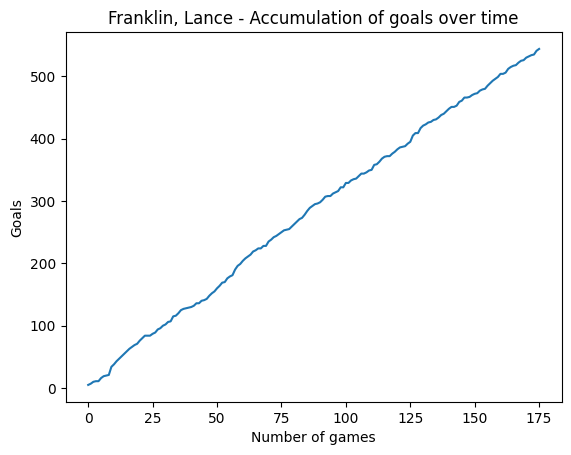

In [2]:
get_random_player = False

# Note: uncomment below line to graph a random player :)
#get_random_player = True

if get_random_player:
    player = games_stats_players["displayName_stats"].sample().values[0]
else:
    player = 'Franklin, Lance'

plot_player(player)


---

## Task 3 – Plot multiple players

### Assignment Spec
> In the one chart, plot the lines for the following players:
> - "Franklin, Lance"
> - "Papley, Tom"
> - "Mumford, Shane"
> - "Hooker, Cale".
>
> Plot each in a different colour so they can be distinguished and add a legend.


### Explanation of Steps taken

TODO

<Axes: title={'center': 'Players - Accumulation of goals over time'}, xlabel='Number of games', ylabel='Goals'>

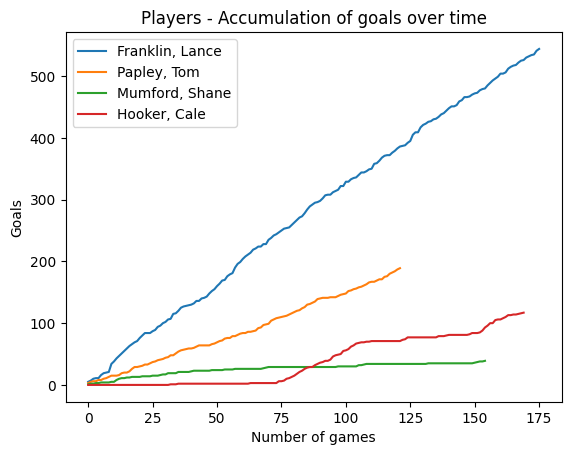

In [3]:
# create masks for filtering
lance_mask = games_stats_players["displayName_stats"] == 'Franklin, Lance'
tom_mask = games_stats_players["displayName_stats"] == 'Papley, Tom'
shane_mask = games_stats_players["displayName_stats"] == 'Mumford, Shane'
cale_mask = games_stats_players["displayName_stats"] == 'Hooker, Cale'

# create dataframes per player & sort to allow for accumulation
lance_stats_desc = games_stats_players[lance_mask].sort_values(by="gameNumber", ascending=True)
tom_stats_desc = games_stats_players[tom_mask].sort_values(by="gameNumber", ascending=True)
shane_stats_desc = games_stats_players[shane_mask].sort_values(by="gameNumber", ascending=True)
cale_stats_desc = games_stats_players[cale_mask].sort_values(by="gameNumber", ascending=True)

# add a cumulative goals column per dataframe
lance_stats_desc["Goals (Cumulative)"] = lance_stats_desc["Goals"].cumsum()
tom_stats_desc["Goals (Cumulative)"] = tom_stats_desc["Goals"].cumsum()
shane_stats_desc["Goals (Cumulative)"] = shane_stats_desc["Goals"].cumsum()
cale_stats_desc["Goals (Cumulative)"] = cale_stats_desc["Goals"].cumsum()

# create player series for graphing. reset_index() to normalise
lance_series = lance_stats_desc["Goals (Cumulative)"].reset_index(drop=True)
tom_series = tom_stats_desc["Goals (Cumulative)"].reset_index(drop=True)
shane_series = shane_stats_desc["Goals (Cumulative)"].reset_index(drop=True)
cale_series = cale_stats_desc["Goals (Cumulative)"].reset_index(drop=True)

# graph all 4 series on a single view
combined_player_graph = \
lance_series.plot(label="Franklin, Lance", legend=True)
tom_series.plot(label="Papley, Tom", legend=True, ax=combined_player_graph)
shane_series.plot(label="Mumford, Shane", legend=True,ax=combined_player_graph)
cale_series.plot(xlabel="Number of games", ylabel="Goals", label="Hooker, Cale",ax=combined_player_graph, title="Players - Accumulation of goals over time", legend=True)


---

## Task 4 – Linear Regression

### Assignment Spec
> Create a second plot showing just "Franklin, Lance" and "Hooker, Cale" but include the linear regression line for each. In other words. as well as showing their actual cummulative goals over time, plot their predicted goals over time where the prediction is done via Linear Regression. Be sure to use different colours for each line and include a legend.


### Explanation of Steps taken

TODO

In [4]:
#todo